## Opis Danych

Ten zbiór danych pochodzi ze słynnego statku pasażerskiego RMS Titanic, który zatonął w 1912 roku. Dane te są powszechnie wykorzystywane do nauki analizy statystycznej, eksploracji danych oraz budowy modeli uczenia maszynowego do przewidywania przeżywalności pasażerów.

**Podstawowe informacje:**

- **Liczba próbek:** 891  
- **Liczba cech:** 12 cech, w tym 1 cecha wynikowa (Survived)

**Cechy:**
- *PassengerId:* Unikalny identyfikator pasażera.
- *Survived:* Zmienna docelowa określająca, czy pasażer przeżył (1) czy nie (0).
- *Pclass:* Klasa pasażerska (1 = Pierwsza, 2 = Druga, 3 = Trzecia).
- *Name:* Pełne imię i nazwisko pasażera.
- *Sex:* Płeć pasażera (male/female).
- *Age:* Wiek pasażera (dane częściowo brakujące).
- *SibSp:* Liczba rodzeństwa i współmałżonków na pokładzie.
- *Parch:* Liczba rodziców i dzieci na pokładzie.
- *Ticket:* Numer biletu pasażera.
- *Fare:* Opłata za bilet.
- *Cabin:* Numer kabiny (częściowo brakujące dane, często pomijany lub przetwarzany).
- *Embarked:* Port zaokrętowania (C = Cherbourg, Q = Queenstown, S = Southampton).

**Obserwacje:**
- Istnieją braki danych w kolumnach *Age* oraz *Cabin*, co będzie wymagało odpowiedniej imputacji lub przetwarzania.
- Cecha *Name* oraz *Ticket* mogą być trudno użyteczne bez odpowiedniego przekształcenia (np. wyodrębnienie tytułu z imienia, uproszczenie numeru biletu) lub mogą zostać pominięte w modelach ilościowych.
- Zmienna *Survived* pełni rolę docelową w zadaniach klasyfikacji: przewidywania, czy pasażer przeżył katastrofę.

Dane te pozwalają na przećwiczenie pełnego procesu analitycznego: od czyszczenia i wstępnego przetwarzania, przez eksplorację i wybór cech, aż po budowę i ewaluację modelu uczenia maszynowego.


In [41]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


In [42]:

# -----------------------------------
# Wczytanie danych 
# -----------------------------------
df = pd.read_csv('data\\titanic.csv')


In [3]:

# -----------------------------------
# EDA - Podstawowe informacje
# -----------------------------------
print(f"Size: {df.shape}\n")

print("Informacje o dataframie:")
df.info()

print("\nPierwsze rekordy:")
display(df.head())


Size: (891, 12)

Informacje o dataframie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Pierwsze rekordy:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

print("\nStatystyki opisowe zmiennych numerycznych:")
display(df.describe())
# display(df.describe(include='all'))


Statystyki opisowe zmiennych numerycznych:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:

print("\nRozkład zmiennej docelowej (Survived):")
print(df['Survived'].value_counts())


Rozkład zmiennej docelowej (Survived):
Survived
0    549
1    342
Name: count, dtype: int64


In [6]:

# Sprawdzenie braków danych
print("\nIlość braków w poszczególnych kolumnach:")
print(df.isnull().sum())


Ilość braków w poszczególnych kolumnach:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


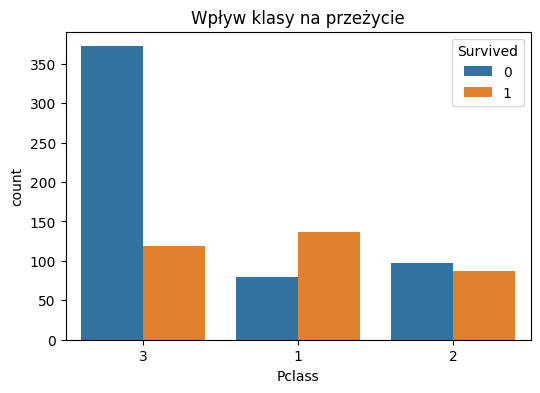

In [7]:
# Wizualizacje
# Wpływ klasy, płci i wieku na przeżycie, np count plot

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Survived", order=df['Pclass'].value_counts().index)
plt.title("Wpływ klasy na przeżycie")
plt.show()

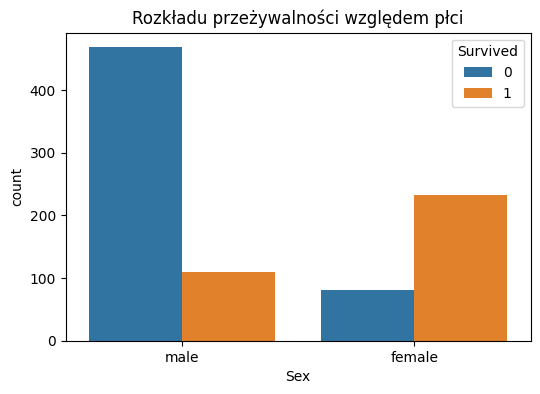

In [8]:

# wizualizacja rozkładu przeżywalności względem płci
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Survived",order=df['Sex'].value_counts().index)
plt.title("Rozkładu przeżywalności względem płci")
plt.show()

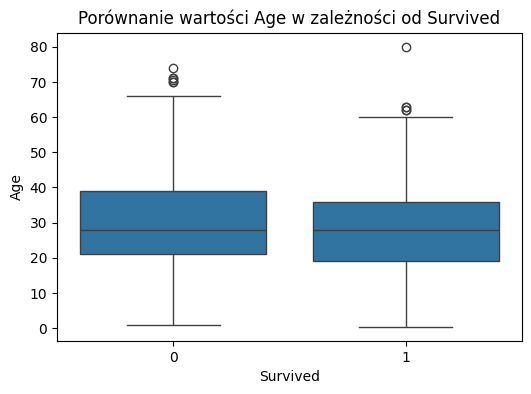

In [9]:


# Boxplot Age vs Survived
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Survived', y ='Age', data=df)
plt.title('Porównanie wartości Age w zależności od Survived')
plt.show()

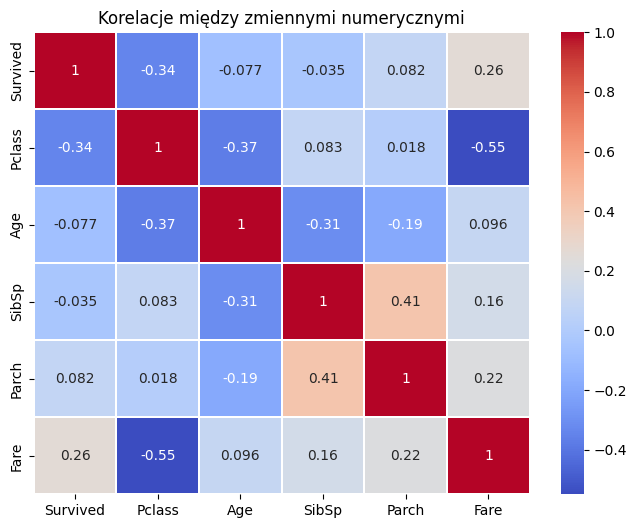

In [10]:
# Korelacje pomiędzy zmiennymi numerycznymi
target = 'Survived'
all_features_for_heatmap = [col for col in df.columns]
numeric_cols = [col for col in all_features_for_heatmap if df[col].dtype != 'object']

num_cols = [col for col in numeric_cols if col != 'PassengerId']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm', linewidths= 0.2)
plt.title("Korelacje między zmiennymi numerycznymi")
plt.show()

In [11]:
# -----------------------------------
# Przetwarzanie danych
# - Kolumny które możemy wyrzucić: PassengerId (nieinformatywna), Name, Ticket, Cabin (zbyt dużo braków)
# - Zakodujemy płeć i port zaokrętowania
# - Uzupełnimy braki w Age oraz Embarked
# -----------------------------------

# Usuwamy niepotrzebne kolumny: PassengerId, Name, Ticket, Cabin
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
df.shape
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:

# Sprawdź jeszcze raz brakujące
print("\nIlość braków w poszczególnych kolumnach:")
print(df.isnull().sum())


Ilość braków w poszczególnych kolumnach:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [14]:

# Podział na cechy i etykietę


# Typy zmiennych
# - Kategoryczne: Sex, Embarked (do zakodowania)
# - Numeryczne: Pclass, Age, SibSp, Parch, Fare (do skalowania) 
# - Docelowa: Survived
# Podział na kolumny numeryczne i kategoryczne do przetwarzania osobno w pipeline 
# (można to zrobić ręcznie lub użyć ColumnTransformer z sklearn.compose)
all_features = [col for col in df.columns if col != target]

numeric_features = [col for col in all_features if df[col].dtype != 'object']
categorical_features = [col for col in all_features if df[col].dtype == 'object']

print("Cechy numeryczne:", numeric_features)
print("Cechy kategoryczne:", categorical_features)

Cechy numeryczne: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Cechy kategoryczne: ['Sex', 'Embarked']


In [45]:
# Będziemy potrzebować imputera dla Age (oraz ewentualnych innych braków w num_cols)
# Age zawiera braki, więc imputacja medianą będzie dobrym startem

# -----------------------------------
# Pipeline: 
#   - dla cech numerycznych: imputacja medianą -> standaryzacja
#   - dla cech kategorycznych: one-hot encoding (bez imputacji, braków już nie ma)
#
# Następnie LR i KNN jako oddzielne pipeline'y
# -----------------------------------

In [15]:
# Pipeline dla zmiennych numerycznych
# Imputer -> Scaler

num_pipeline = Pipeline([
   ('imputer', SimpleImputer(strategy='median')),
   ('scaler', StandardScaler())
])

# Pipeline dla zmiennych kategorycznych
# Imputer -> OneHotEncoder

cat_pipeline = Pipeline([
   ('encoder', OneHotEncoder(drop='first'))
])

In [16]:
# Definicja kolumn do przetwarzania w ColumnTransformer, który połączy oba pipeline'y
preprocessor = ColumnTransformer([
    ('num',num_pipeline,numeric_features),
    ('cat',cat_pipeline,categorical_features)
],remainder='drop')

In [36]:

# Modele LR i KNN jako pipeline'y z preprocessor'em
# LR z domyślnymi parametrami, KNN z n_neighbors=5
# Można dodać parametry do pipeline'a, np random_state=42
# Można też dodać więcej kroków do pipeline'a, np PCA, ale na razie zostawmy tak jak jest

lr_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    # ('pca',PCA(n_components=2)),
    ('clf',LogisticRegression(random_state=42, max_iter= 1000))
])

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf',KNeighborsClassifier(n_neighbors=5))
])

lr_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

In [ ]:

# Podział na train/test
X = df.drop(target,axis=1)
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42,stratify=y)

In [38]:

# Trening i ewaluacja LR
# lr_pipeline.fit(X_train,y_train)
grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5,scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
y_pred_lr = grid.predict(X_test)


c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [39]:


print("\nWyniki dla Logistic Regression:")
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_lr))
print("Classification Report:\n",classification_report(y_test,y_pred_lr,target_names=['Survived','Not Survived']))


Wyniki dla Logistic Regression:
Accuracy: 0.7685834502103787
Confusion Matrix:
 [[400  39]
 [126 148]]
Classification Report:
               precision    recall  f1-score   support

    Survived       0.76      0.91      0.83       439
Not Survived       0.79      0.54      0.64       274

    accuracy                           0.77       713
   macro avg       0.78      0.73      0.74       713
weighted avg       0.77      0.77      0.76       713



In [51]:

# Trening i ewaluacja KNN
knn_pipeline.fit(X_train,y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [52]:

print("\nWyniki dla KNN:")
print("Accuracy:", accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_knn) )
print("Classification Report:\n", classification_report(y_test,y_pred_knn,target_names= ['Survived','Not Survived']))



Wyniki dla KNN:
Accuracy: 0.7727910238429172
Confusion Matrix:
 [[385  54]
 [108 166]]
Classification Report:
               precision    recall  f1-score   support

    Survived       0.78      0.88      0.83       439
Not Survived       0.75      0.61      0.67       274

    accuracy                           0.77       713
   macro avg       0.77      0.74      0.75       713
weighted avg       0.77      0.77      0.77       713



In [35]:


# Porównanie Accuracy
print("\nPorównanie Accuracy:")
print(f"Logistic Regression: {accuracy_score(y_test,y_pred_lr)}")
print(f"KNN: {accuracy_score(y_test,y_pred_knn)}")



Porównanie Accuracy:
Logistic Regression: 0.8064516129032258
KNN: 0.7727910238429172


In [ ]:

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())  # placeholder, będzie nadpisany w param_grid
])

param_grid_LR = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

param_grid = [
    {'clf': [LogisticRegression(random_state=42, max_iter=1000)], 'clf__C': [0.1, 1, 10],'clf__penalty': ['l2'],},
    {'clf': [KNeighborsClassifier()], 'clf__n_neighbors': [3, 5, 7]}
]

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

display("Best model:", grid.best_estimator_)
print("Best accuracy", accuracy_score(y_test,y_pred))
print('Cofusion matrix:', confusion_matrix(y_test,y_pred))


c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py", line 1195, in score
    Xt = transform.transform(Xt)
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, 

'Best model:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

Best accuracy 0.7685834502103787
